In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


<AxesSubplot:>

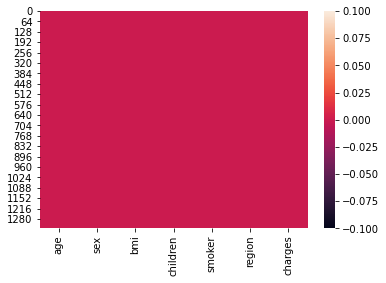

In [6]:
sns.heatmap(df.isnull())
#sns.heatmap(df.isnull(),linewidths=0,cmap='coolwarm',annot=True,linecolor='white')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
s=pd.get_dummies(df['sex'],drop_first=True)

In [9]:
s.head()

,male
0,0
1,1
2,1
3,1
4,1


In [10]:
e=pd.get_dummies(df['smoker'],drop_first=True)

In [11]:
e.head()

,yes
0,1
1,0
2,0
3,0
4,0


In [12]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [13]:
f=pd.get_dummies(df['region'],drop_first=True)

In [14]:
f.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [15]:
dff=pd.concat([df,s,e,f ], axis=1)

In [16]:
dff.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


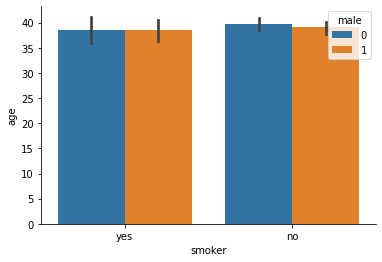

In [17]:
sns.barplot(x='smoker', y='age',data=dff, hue='male')
sns.despine()

In [18]:
dff.drop(['sex','smoker','region'],axis=1, inplace=True)

In [19]:
dff.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


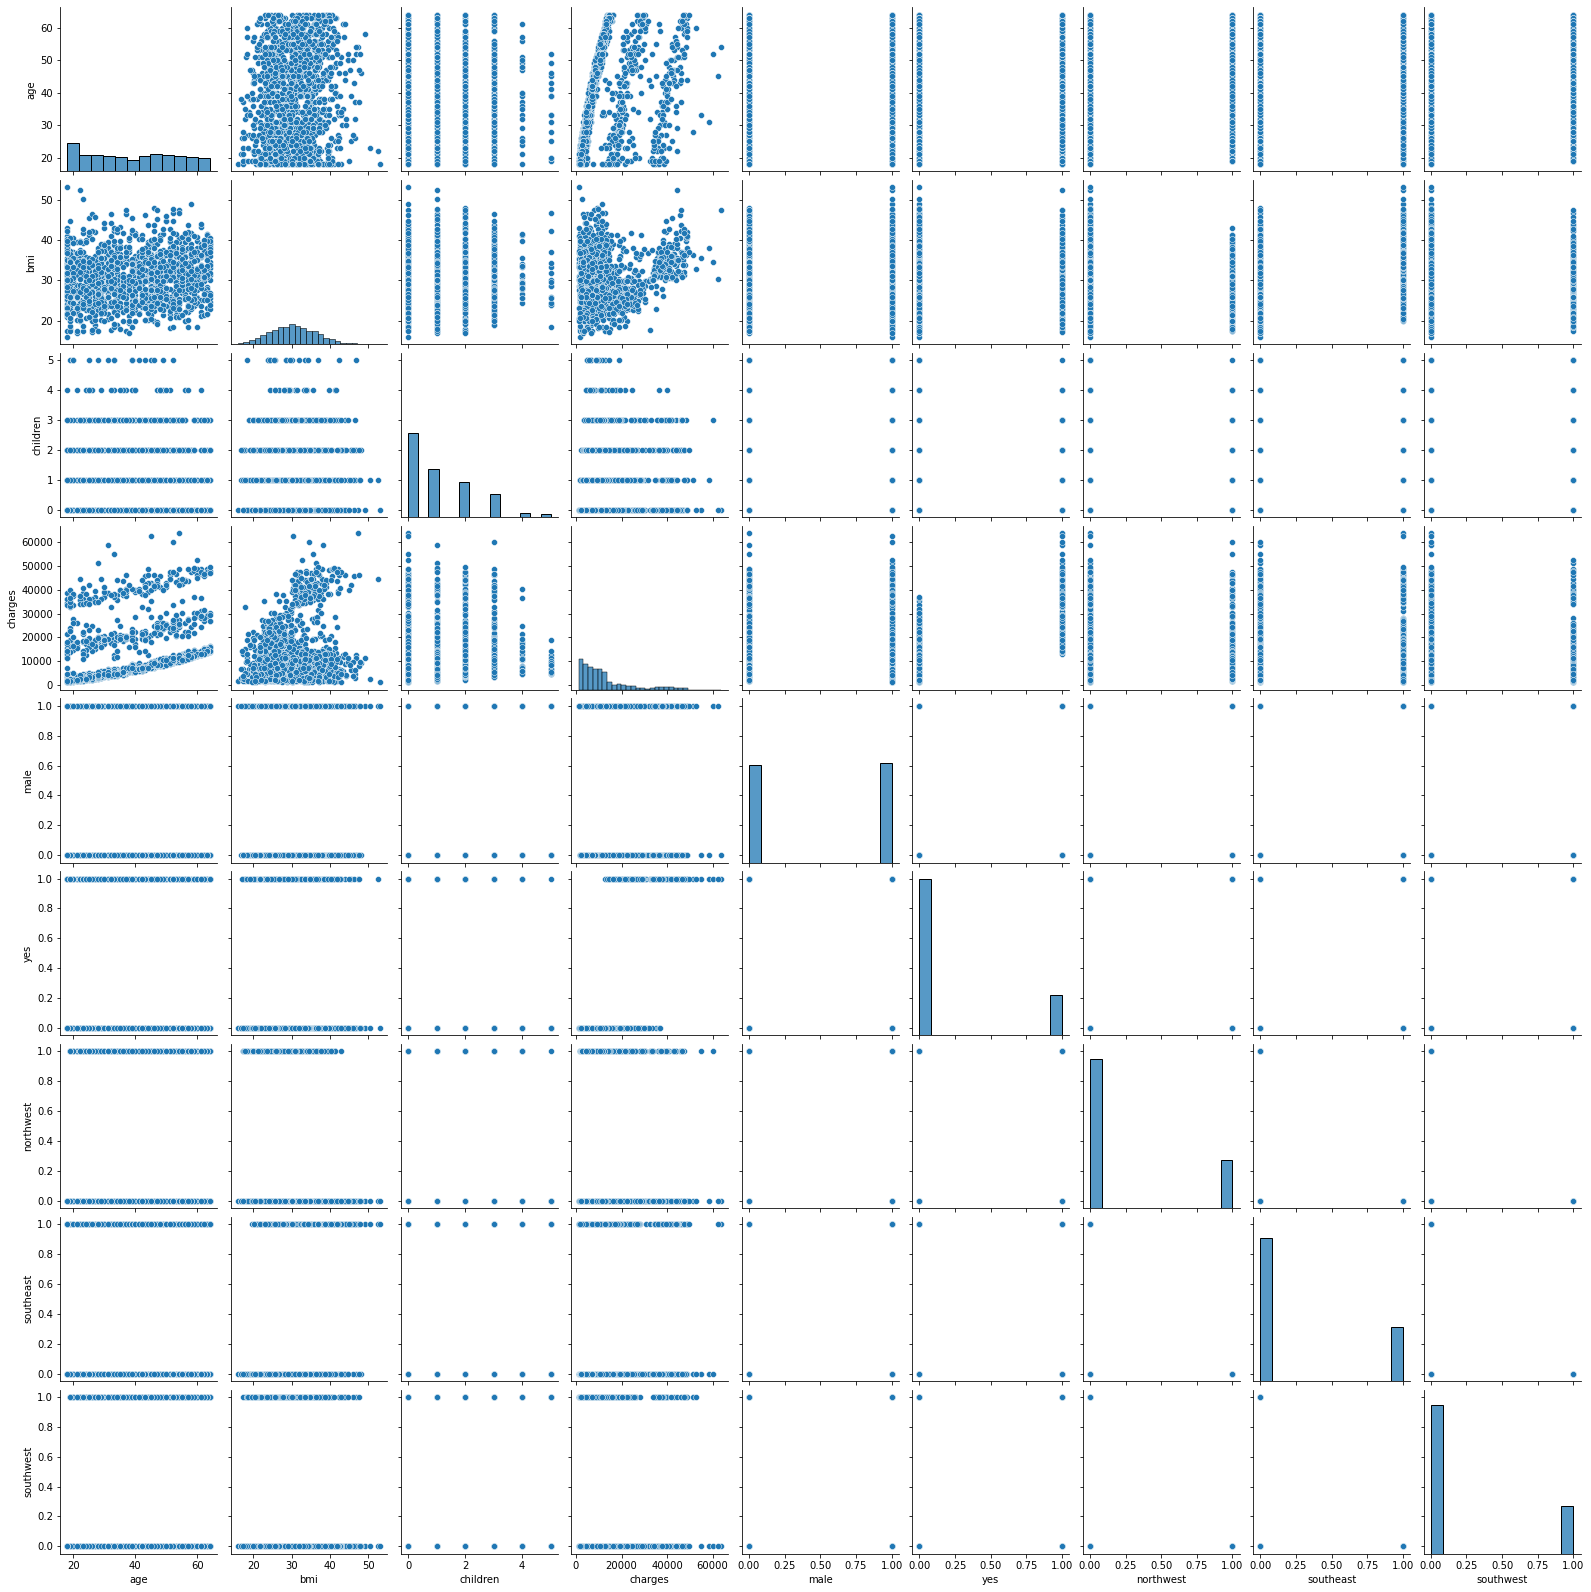

In [20]:
sns.pairplot(dff)


<AxesSubplot:xlabel='charges', ylabel='age'>

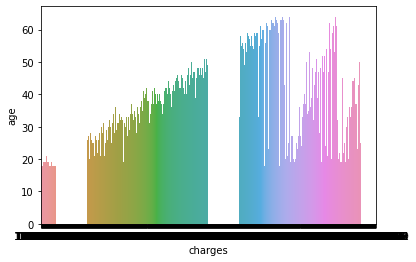

In [21]:

sns.barplot(x='charges',y='age' ,data=dff  )

In [22]:
dff.describe()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
dff.corr()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


<AxesSubplot:>

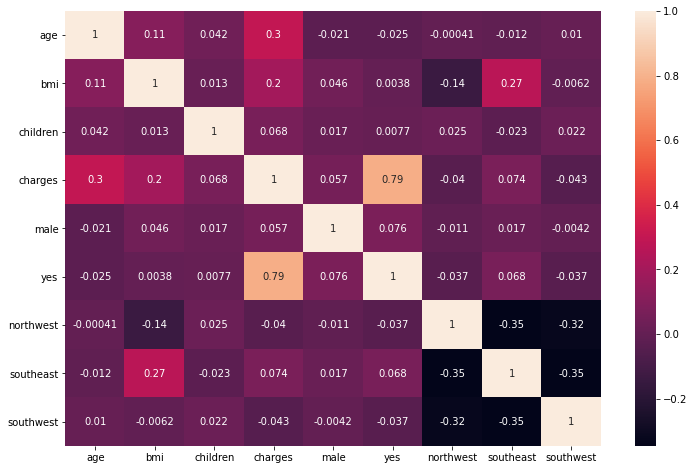

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(dff.corr() , annot =True)

In [25]:
dff.columns

Index(['age', 'bmi', 'children', 'charges', 'male', 'yes', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [26]:
dff.drop(['male', 'northwest','southeast', 'southwest'] ,axis=1,inplace=True)

In [27]:
dff.drop('yes',axis=1 ,inplace=True)

In [28]:

dff.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss=StandardScaler()

In [31]:
scaled = ss.fit_transform(dff.drop('charges', axis=1))

In [32]:
scaled

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [33]:
scaled.shape

(1338, 3)

In [34]:
y=dff['charges']

In [35]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [36]:
dff

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [37]:
X=pd.DataFrame(scaled,columns=dff.columns[:-1])

In [38]:
X.head()

,age,bmi,children
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614


In [39]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr=LinearRegression()

In [44]:
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
ypred=lr.predict(X_test)

In [46]:
ypred

array([17005.47733751,  9960.84625147, 21868.20331631, 14446.43988006,
       11809.90988396, 20330.343782  ,  7582.90780556,  6735.04275275,
       14773.15984844, 19994.48155124,  4527.23631343, 11140.8057901 ,
       17536.38955518, 17294.36015162, 18818.59821169, 13435.90211492,
       18317.6175432 ,  8440.92726578, 13952.68217275, 13610.99642979,
        6353.21590457,  9706.22325731, 11273.59293523,  5198.22295266,
       19937.42123884,  8308.95537237, 10252.10121982, 11204.70441394,
        8748.01186684,  9526.26896887, 11379.09114989, 15292.34230387,
       12042.56865461, 14797.33877263, 13001.80138651, 11331.48686239,
       15077.02680018, 17132.887311  ,  9960.84625147, 11889.74312938,
       14840.85766466, 10620.27903432, 13906.59151948, 19155.59596914,
       11536.62036949, 16475.21757989, 10980.90173234,  4492.10612289,
       15074.44587229,  6835.16379578,  9889.32165367,  9942.43834505,
       14411.30968952, 19632.16668871, 13580.61591559,  7829.05281821,
      

In [47]:
y_test

811     6360.99360
161    36149.48350
199    14901.51670
497     8027.96800
647     8252.28430
          ...     
914     5257.50795
919     5245.22690
65      1743.21400
347     8334.45755
927    12032.32600
Name: charges, Length: 402, dtype: float64

In [48]:
#calculate coefficient

In [49]:
lr.coef_

array([3369.5480749 , 2141.50396937,  524.78179942])

In [50]:
lr.intercept_

13352.205873297798

In [51]:
lr.predict([[-1.438764,-0.453320,-0.908614]])

array([7056.61073756])

In [52]:
from sklearn import metrics

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, ypred))
print('MSE:', metrics.mean_squared_error(y_test, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

MAE: 8965.973114149063
MSE: 123954495.3833895
RMSE: 11133.48532057188


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

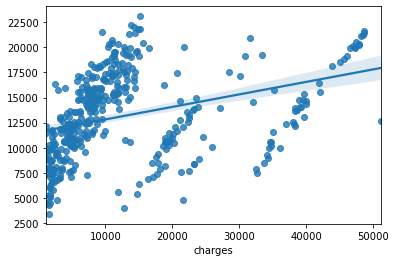

In [54]:
sns.regplot(y_test, ypred)

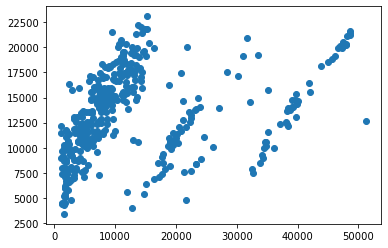

In [55]:
plt.scatter(y_test,ypred)

(array([  1.,   0.,  43.,   1.,  12.,  41.,   6.,  30., 228.,  40.]),
 array([-38557.15208446, -33310.3395435 , -28063.52700255, -22816.71446159,
        -17569.90192064, -12323.08937969,  -7076.27683873,  -1829.46429778,
          3417.34824318,   8664.16078413,  13910.97332509]),
 <BarContainer object of 10 artists>)

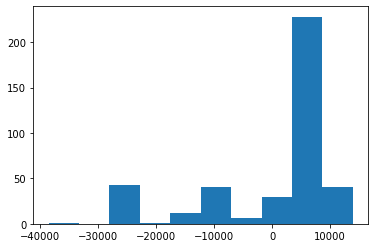

In [56]:
plt.hist(ypred-y_test)

In [57]:
#df1=pd.DataFrame(lr.coef_ ,X.columns )
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,3369.548075
bmi,2141.503969
children,524.781799


<AxesSubplot:ylabel='charges'>

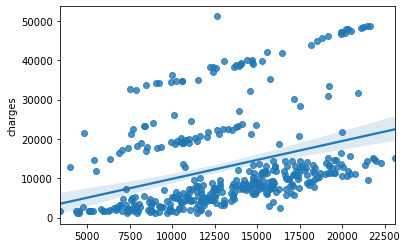

In [58]:
sns.regplot(x=ypred,y=y_test)